# 1.5.1 scipy.io

In [1]:
import scipy.io as spio

In [3]:
import numpy as np

In [4]:
a = np.ones((3, 3))

In [5]:
spio.savemat('file.mat', {'a': a})

In [6]:
data = spio.loadmat('file.mat')

In [7]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Mar 13 15:01:29 2019',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])}

In [8]:
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# 1.5.2 scipy.special

いろんな関数がある

# 1.5.3 scipy.linalg

In [9]:
import scipy.linalg as lin

In [22]:
lin.det(np.array([[2, 3],
                  [2, 3]]))

-3.3306690738754696e-16

In [23]:
arr = np.array([[1, 2],
                [3, 4]])

In [24]:
lin.inv(arr)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [25]:
lin.svd(arr)

(array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]]),
 array([5.4649857 , 0.36596619]),
 array([[-0.57604844, -0.81741556],
        [ 0.81741556, -0.57604844]]))

In [27]:
uarr, spec, vharr = lin.svd(arr)

In [28]:
sarr = np.diag(spec)

In [29]:
svd_mat = uarr.dot(sarr).dot(vharr)

In [30]:
svd_mat

array([[1., 2.],
       [3., 4.]])

# 1.5.4 scipy.interpolate

In [36]:
from scipy.interpolate import interp1d as interp

In [38]:
import matplotlib.pyplot as plt

In [70]:
def sin():
    time = np.linspace(0, 1, 10)
    noise = (np.random.random(10)*2 - 1)*0.1
    measures = np.sin(2 * np.pi * time) + noise
    cubic_interp = interp1d(time, measures, kind='cubic')
    cubic_results = cubic_interp(np.linspace(0, 1, 50))
    
    plt.figure(figsize=(6, 4))
    plt.plot(np.linspace(0, 1, 50), cubic_results, label='cubic interp')
    plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), label='sin')
    plt.legend()
    plt.show()

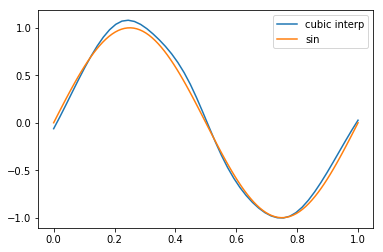

In [71]:
sin()

# 1.5.5 scipy.optimize

## 1.5.5.1

In [72]:
from scipy import optimize

In [83]:
def sin():
    x_data = np.linspace(-5, 5, num=50)
    y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
    def test_func(x, a, b):
        return a * np.sin(b * x)
    params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
    
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function')
    
    plt.legend()
    plt.show()

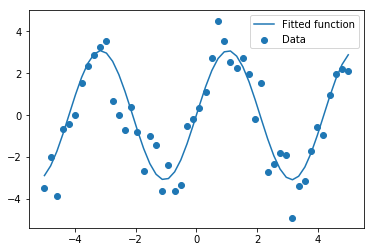

In [91]:
sin()

In [92]:
def sin():
    x_data = np.linspace(-5, 5, num=50)
    y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
    def test_func(x, a, b):
        return a * np.sin(b * x)
    params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
    
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, test_func(x_data, params[0], params[1]), label='Fitted function')
    
    plt.legend()
    plt.show()

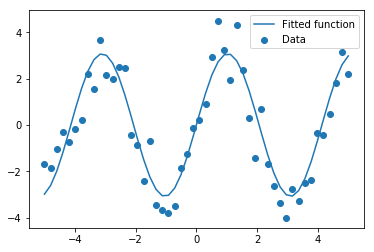

In [94]:
sin()

Exercise: Curve fitting of temperature data

In [134]:
def temp():
    temp_max = np.array([ 17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
    temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
    temp_x = np.arange(1, 13)
    
    x_data = np.linspace(1, 12, num=365)
    def test_func(x, a, b, c, d):
        return a*(np.sin(b*(x + c)) + d)
    
    params_max, params_max_covariance = optimize.curve_fit(test_func, temp_x, temp_max)
    plt.scatter(temp_x, temp_max, label='Max')
    plt.plot(x_data, test_func(x_data, *params_max), label='Fitted Max')
    
    params_min, params_min_covariance = optimize.curve_fit(test_func, temp_x, temp_min)
    plt.scatter(temp_x, temp_min, label='Min')
    plt.plot(x_data, test_func(x_data, *params_min), label='Fitted Min')
    
    plt.xticks(temp_x)
    
    plt.legend()
    plt.show()

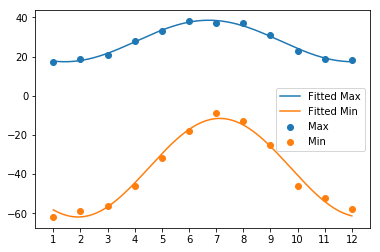

In [135]:
temp()

## 1.5.5.2

Exercise: 2-D minimization

In [196]:
def f(x):
    return ((4 - 2.1*(x[0]**2) + (x[0]**4)/3.)*(x[0]**2) + x[0]*x[1] + (4*(x[1]**2) - 4)*(x[1]**2))

In [197]:
res = optimize.minimize(f, x0=[1,0], method="L-BFGS-B")

In [198]:
res

      fun: -1.0316284534894131
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.50910404e-06, -1.15463195e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 33
      nit: 7
   status: 0
  success: True
        x: array([ 0.08984234, -0.7126565 ])

In [257]:
def sixhump():
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-1, 1, 100)
    xv, yv = np.meshgrid(x, y)
    
    
    plt.contourf(f([xv, yv]), 100, alpha=.75, cmap=plt.cm.binary, extent=[-2, 2, -1, 1])
    C = plt.contour(f([xv, yv]), 10, colors='black', extent=[-2, 2, -1, 1])
    plt.clabel(C, inline=1, fontsize=8)
    
    t0 = optimize.minimize(f, x0=[0,-0.75], method="L-BFGS-B").x
    plt.scatter(*t0, 50, color='red')
    
    t1 = optimize.minimize(f, x0=[1.5,-0.75], method="L-BFGS-B").x
    plt.scatter(*t1, 50, color='red')
    
    t2 = optimize.minimize(f, x0=[-1.5,-0.6], method="L-BFGS-B").x
    plt.scatter(*t2, 50, color='red')
    
    t3 = optimize.minimize(f, x0=[0,0.75], method="L-BFGS-B").x
    plt.scatter(*t3, 50, color='red')
    
    t4 = optimize.minimize(f, x0=[-1.5,0.75], method="L-BFGS-B").x
    plt.scatter(*t4, 50, color='red')
    
    t5 = optimize.minimize(f, x0=[1.5,0.6], method="L-BFGS-B").x
    plt.scatter(*t5, 50, color='red')
    
    plt.show()

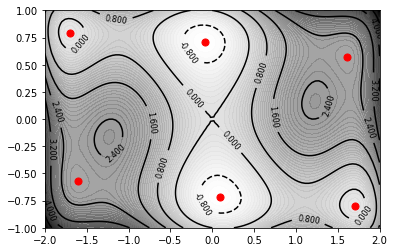

In [258]:
sixhump()

## 1.5.5.3

In [259]:
def f(x):
    return (x-2)*(x-3)

In [261]:
optimize.root(f, x0=5).x

array([3.])

In [262]:
optimize.root(f, x0=0).x

array([2.])